# Class 4 Notebook – Unsupervised Learning: K-Means Clustering

This notebook introduces **Unsupervised Learning** using **K-Means clustering** as a first example.

Unlike supervised learning (Class 2 and Class 3), where we have labeled data and predict targets, **unsupervised learning** discovers patterns in data **without labels**. We'll use K-Means to automatically group customers based on their behavior.

**Objective**: Group customers into segments based on **Annual Income** and **Spending Score** without any predefined labels.

**Model type**: K-Means Clustering (unsupervised learning).

**Key idea**: The algorithm automatically discovers groups (clusters) in the data by finding the center points (centroids) that minimize the distance to nearby data points.

We'll follow a step-by-step workflow:

1. Install/import libraries
2. Create or load dataset
3. Visualize data (before clustering)
4. Apply K-Means clustering
5. Get cluster labels
6. Visualize clusters
7. Interpret results

Run the first code cell to confirm your environment works.

## Run in the browser (no local setup)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adzuci/ai-fundamentals/blob/class-4-unsupervised-learning/class-4-unsupervised-learning/01_class_4_kmeans_basics.ipynb)

> Tip: This notebook assumes you're comfortable with basic Python, NumPy, Pandas, and Matplotlib from Classes 2 and 3.

## Why Unsupervised Learning?

**Supervised Learning** (Classes 2-3):
- We have **labeled data** (features + target)
- Goal: Learn to predict the target from features
- Examples: Predict house price (regression), predict pass/fail (classification)

**Unsupervised Learning** (Class 4):
- We have **unlabeled data** (only features, no target)
- Goal: Discover hidden patterns, groups, or structures
- Examples: Customer segmentation, anomaly detection, dimensionality reduction

In this notebook:
- **No target column** — we don't know which customers belong to which group
- **No labels provided** — the algorithm discovers patterns automatically
- **K-Means finds clusters** — groups similar customers together

## STEP 1: Install Required Libraries

If running locally, install the required packages. In Colab, these are already available.

In [1]:
# Install required libraries (run this if needed)
# Uncomment the line below if running locally and packages aren't installed
# !pip install numpy pandas matplotlib scikit-learn

## STEP 2: Import Libraries

Import NumPy, Pandas, Matplotlib, and scikit-learn's KMeans.

In [2]:
# Environment sanity check + imports
import platform

print("Python:", platform.python_version())
print("OS:", platform.system(), platform.release())

try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans

    print("NumPy:", np.__version__, "| Pandas:", pd.__version__)
    print("All libraries imported successfully!")
except ModuleNotFoundError as exc:
    print("Missing dependency:", exc)
    print("Install with: python -m pip install numpy pandas matplotlib scikit-learn")
    raise

Python: 3.10.14
OS: Darwin 25.2.0
NumPy: 2.2.6 | Pandas: 2.3.3
All libraries imported successfully!


## STEP 3: Create Sample Dataset

We'll create a simple customer dataset with:
- **Income**: Annual income (in thousands)
- **Spending**: Spending score (0-100)

Notice: **No target/label column** — this is unsupervised learning!

In [3]:
# Create sample customer data
data = {
    "Income": [15, 16, 17, 18, 19, 60, 62, 63, 64, 65],
    "Spending": [39, 41, 40, 42, 38, 80, 82, 81, 83, 79]
}

df = pd.DataFrame(data)
print("Customer Data:")
print(df)
print("\nData shape:", df.shape)
print("Notice: No 'target' or 'label' column — this is unsupervised learning!")

Customer Data:
   Income  Spending
0      15        39
1      16        41
2      17        40
3      18        42
4      19        38
5      60        80
6      62        82
7      63        81
8      64        83
9      65        79

Data shape: (10, 2)
Notice: No 'target' or 'label' column — this is unsupervised learning!


## STEP 4: Visualize Data (Before Clustering)

Let's see what the raw data looks like before applying clustering. Can you spot any natural groups?

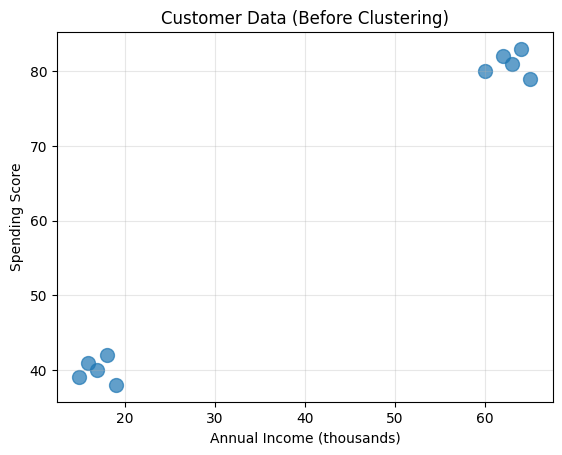

In [4]:
# Visualize the raw data
plt.scatter(df["Income"], df["Spending"], s=100, alpha=0.7)
plt.xlabel("Annual Income (thousands)")
plt.ylabel("Spending Score")
plt.title("Customer Data (Before Clustering)")
plt.grid(True, alpha=0.3)
plt.show()

## STEP 5: Apply K-Means

K-Means will automatically find **2 clusters** in our data. The algorithm:

1. Randomly initializes 2 cluster centers (centroids)
2. Assigns each point to the nearest centroid
3. Updates centroids to the mean of their assigned points
4. Repeats until convergence

We use `n_clusters=2` because we expect two customer segments (low vs high income/spending).

In [5]:
# Apply K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)

print("K-Means model fitted successfully!")
print("Cluster centers (centroids):")
print(kmeans.cluster_centers_)

K-Means model fitted successfully!
Cluster centers (centroids):
[[17.  40. ]
 [62.8 81. ]]


## STEP 6: Get Cluster Labels

Each customer is now assigned to a cluster (0 or 1). These labels were **discovered automatically** by the algorithm.

In [6]:
# Get cluster labels for each data point
labels = kmeans.labels_
print("Cluster labels:", labels)
print("\nEach number represents which cluster the customer belongs to:")
print("- 0 = Cluster 0")
print("- 1 = Cluster 1")

Cluster labels: [0 0 0 0 0 1 1 1 1 1]

Each number represents which cluster the customer belongs to:
- 0 = Cluster 0
- 1 = Cluster 1


## Example 2: Student Study Patterns

Let's try K-Means clustering on a different dataset: **student study patterns**. We'll use **Study Hours** and **Sleep Hours** to discover groups of students with similar study habits.

**Question**: Can we automatically group students based on their study and sleep patterns?

In [ ]:
plt.scatter(df["Study_Hours"], df["Sleep_Hours"])
plt.xlabel("Study_Hours")
plt.ylabel("Sleep_Hours")
plt.title("Students Data ")
plt.show()

In [ ]:
kms = KMeans(n_clusters=2, random_state=42)
kms.fit(df)

In [ ]:
# Get cluster labels and add to DataFrame
df["Cluster"] = kms.labels_
print(df)

# Visualize clusters
plt.scatter(df["Study_Hours"], df["Sleep_Hours"], c=df["Cluster"], cmap='coolwarm', s=100, alpha=0.7)
plt.scatter(kms.cluster_centers_[:, 0], kms.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids', linewidths=2)
plt.xlabel("Study_Hours")
plt.ylabel("Sleep_Hours")
plt.title("Student Study Patterns (K-Means Clustering)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.colorbar(label='Cluster')
plt.show()

## Example 2: Student Study Patterns

Let's try K-Means clustering on a different dataset: **student study patterns**. We'll use **Study Hours** and **Sleep Hours** to discover groups of students with similar study habits.

**Question**: Can we automatically group students based on their study and sleep patterns?

In [ ]:
# Create student dataset (10 students)
student_data = {
    "Study_Hours": [2, 4, 6, 8, 10, 12, 3, 5, 7, 9],
    "Sleep_Hours": [9, 8, 7, 6, 5, 4, 9, 8, 6, 5]
}

df = pd.DataFrame(student_data)
print(df)

In [ ]:
plt.scatter(df["Study_Hours"], df["Sleep_Hours"])
plt.xlabel("Study_Hours")
plt.ylabel("Sleep_Hours")
plt.title("Students Data ")
plt.show()

In [ ]:
kms = KMeans(n_clusters=2, random_state=42)
kms.fit(df)

In [ ]:
# Get cluster labels and add to DataFrame
df["Cluster"] = kms.labels_
print(df)

# Visualize clusters
plt.scatter(df["Study_Hours"], df["Sleep_Hours"], c=df["Cluster"], cmap='coolwarm', s=100, alpha=0.7)
plt.scatter(kms.cluster_centers_[:, 0], kms.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids', linewidths=2)
plt.xlabel("Study_Hours")
plt.ylabel("Sleep_Hours")
plt.title("Student Study Patterns (K-Means Clustering)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.colorbar(label='Cluster')
plt.show()

## Example 2: Student Study Patterns

Let's try K-Means clustering on a different dataset: **student study patterns**. We'll use **Study Hours** and **Sleep Hours** to discover groups of students with similar study habits.

**Question**: Can we automatically group students based on their study and sleep patterns?

In [ ]:
plt.scatter(df["Study_Hours"], df["Sleep_Hours"])
plt.xlabel("Study_Hours")
plt.ylabel("Sleep_Hours")
plt.title("Students Data ")
plt.show()

In [ ]:
kms = KMeans(n_clusters=2, random_state=42)
kms.fit(df)

In [ ]:
# Get cluster labels and add to DataFrame
df["Cluster"] = kms.labels_
print(df)

# Visualize clusters
plt.scatter(df["Study_Hours"], df["Sleep_Hours"], c=df["Cluster"], cmap='coolwarm', s=100, alpha=0.7)
plt.scatter(kms.cluster_centers_[:, 0], kms.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids', linewidths=2)
plt.xlabel("Study_Hours")
plt.ylabel("Sleep_Hours")
plt.title("Student Study Patterns (K-Means Clustering)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.colorbar(label='Cluster')
plt.show()

## STEP 7: Add Cluster Column to DataFrame

Let's add the cluster labels as a new column so we can see which customers belong to which group.

In [ ]:
# Visualize student data before clustering
plt.scatter(df_students["Study_Hours"], df_students["Sleep_Hours"], s=100, alpha=0.7)
plt.xlabel("Study_Hours")
plt.ylabel("Sleep_Hours")
plt.title("Students Data")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Apply K-Means clustering with 2 clusters
kmeans_students = KMeans(n_clusters=2, random_state=42)
kmeans_students.fit(df_students[["Study_Hours", "Sleep_Hours"]])

# Add cluster labels
df_students["Cluster"] = kmeans_students.labels_

print("Student data with cluster assignments:")
print(df_students)

# Visualize clusters
plt.scatter(df_students["Study_Hours"], df_students["Sleep_Hours"], 
            c=df_students["Cluster"], cmap='coolwarm', s=100, alpha=0.7)
plt.scatter(kmeans_students.cluster_centers_[:, 0], kmeans_students.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids', linewidths=2)
plt.xlabel("Study_Hours")
plt.ylabel("Sleep_Hours")
plt.title("Student Study Patterns (K-Means Clustering)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.colorbar(label='Cluster')
plt.show()

print("\nInterpretation:")
print("- Cluster 0: Students with balanced study/sleep patterns")
print("- Cluster 1: Students with extreme patterns (very high study OR very high sleep)")

In [7]:
# Add cluster labels to the DataFrame
df["Cluster"] = labels
print("DataFrame with cluster assignments:")
print(df)

DataFrame with cluster assignments:
   Income  Spending  Cluster
0      15        39        0
1      16        41        0
2      17        40        0
3      18        42        0
4      19        38        0
5      60        80        1
6      62        82        1
7      63        81        1
8      64        83        1
9      65        79        1


## STEP 8: Visualize Clusters

Now let's visualize the clusters with different colors. This shows how K-Means grouped the customers.

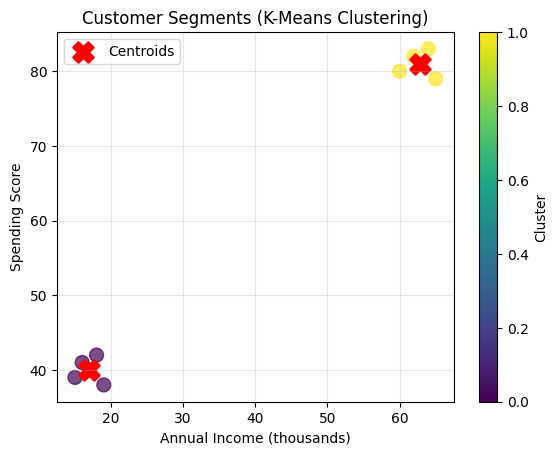

In [8]:
# Visualize clusters with different colors
plt.scatter(df["Income"], df["Spending"], c=df["Cluster"], cmap='viridis', s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids', linewidths=2)
plt.xlabel("Annual Income (thousands)")
plt.ylabel("Spending Score")
plt.title("Customer Segments (K-Means Clustering)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.colorbar(label='Cluster')
plt.show()

## INTERPRETATION

Based on the clusters we found:

- **Cluster 0** → Low Income, Low Spending
  - Customers with lower annual income and lower spending scores
  - Example: Budget-conscious customers

- **Cluster 1** → High Income, High Spending
  - Customers with higher annual income and higher spending scores
  - Example: High-value customers

This segmentation can help businesses:
- Target marketing campaigns
- Personalize product recommendations
- Understand customer behavior patterns

## Why This Is Unsupervised Learning

Key differences from supervised learning:

- ✅ **No target column** — we didn't provide labels like "Segment A" or "Segment B"
- ✅ **No labels provided** — the algorithm discovered the groups automatically
- ✅ **Algorithm discovers patterns** — K-Means found natural groupings in the data

In supervised learning (Classes 2-3), we would have had a column like `Segment` with predefined values, and we'd train a model to predict it. Here, we're discovering those segments from scratch!

## BONUS: Change Number of Clusters

What happens if we try **3 clusters** instead of 2? This can reveal more granular customer segments.

**Try it yourself**: Change `n_clusters=3` and see how the segmentation changes!

DataFrame with 3-cluster assignments:
   Income  Spending  Cluster_3
0      15        39          2
1      16        41          0
2      17        40          0
3      18        42          0
4      19        38          2
5      60        80          1
6      62        82          1
7      63        81          1
8      64        83          1
9      65        79          1


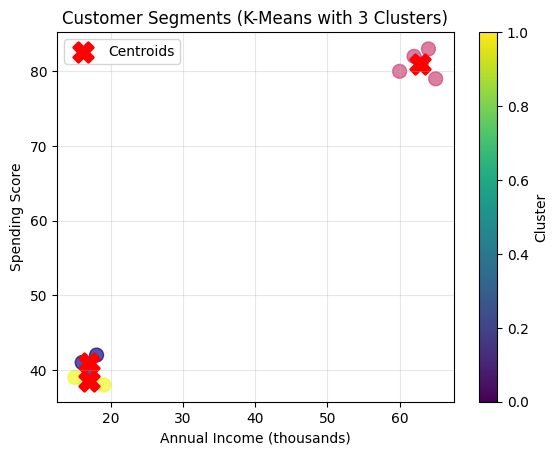


How do the segments differ with 3 clusters vs 2?


In [9]:
# Try K-Means with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(df[["Income", "Spending"]])  # Use only the feature columns

df_3 = df.copy()
df_3["Cluster_3"] = kmeans_3.labels_

print("DataFrame with 3-cluster assignments:")
print(df_3[["Income", "Spending", "Cluster_3"]])

# Visualize 3 clusters
plt.scatter(df_3["Income"], df_3["Spending"], c=df_3["Cluster_3"], 
            cmap='plasma', s=100, alpha=0.7)
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids', linewidths=2)
plt.xlabel("Annual Income (thousands)")
plt.ylabel("Spending Score")
plt.title("Customer Segments (K-Means with 3 Clusters)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.colorbar(label='Cluster')
plt.show()

print("\nHow do the segments differ with 3 clusters vs 2?")

## Key Learning

**K-Means Clustering** is a simple but powerful unsupervised learning algorithm:

- Automatically discovers groups (clusters) in unlabeled data
- Requires specifying the number of clusters (`n_clusters`)
- Works well when clusters are roughly spherical and well-separated
- Useful for customer segmentation, image compression, anomaly detection, and more

**Next steps**: Try this on larger datasets, experiment with different numbers of clusters, and explore other unsupervised learning algorithms like hierarchical clustering or dimensionality reduction (PCA).